In [1]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F


In [2]:
train = torchvision.datasets.FashionMNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = torchvision.datasets.FashionMNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
train_set = torch.utils.data.DataLoader(dataset=train, batch_size=100, shuffle=True)
test_set = torch.utils.data.DataLoader(dataset=test, batch_size=100, shuffle=False)


for data in train_set:
    image,label = data
    print(label)
    break

tensor([3, 6, 5, 4, 9, 6, 4, 6, 9, 5, 1, 1, 2, 1, 0, 2, 9, 1, 7, 9, 8, 2, 7, 2,
        5, 8, 1, 3, 3, 3, 5, 5, 5, 0, 3, 8, 7, 0, 6, 1, 1, 9, 9, 0, 0, 9, 8, 2,
        9, 7, 2, 0, 5, 2, 3, 7, 9, 8, 3, 9, 3, 4, 1, 0, 0, 2, 8, 1, 4, 0, 7, 7,
        7, 0, 9, 5, 8, 9, 7, 6, 7, 6, 0, 7, 0, 9, 8, 5, 7, 9, 4, 6, 1, 4, 4, 7,
        0, 8, 3, 6])


In [4]:
import matplotlib.pyplot as plt
image.shape

torch.Size([100, 1, 28, 28])

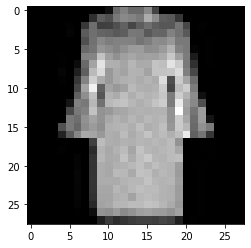

In [5]:
plt.imshow(image[0].squeeze(),cmap='gray')

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=64)
        self.out = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2 , stride=2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = x.reshape(-1,12*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.out(x)
        return x 
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
image = torch.rand(1,1,28,28)
preds = net(image)
preds


tensor([[ 0.0611,  0.0749, -0.0880,  0.0255, -0.0056,  0.0808,  0.0014, -0.0525,
         -0.0542,  0.0760]], grad_fn=<AddmmBackward>)

In [8]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 25

for epoch in range(epochs):
    losses = []
    for batch in train_set:
        images , labels = batch
        
        preds = net(images)
        loss = F.cross_entropy(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        losses.append(loss)
    print(loss)
   
        
        
        

tensor(0.6535, grad_fn=<NllLossBackward>)
tensor(0.5215, grad_fn=<NllLossBackward>)
tensor(0.5084, grad_fn=<NllLossBackward>)
tensor(0.5542, grad_fn=<NllLossBackward>)
tensor(0.3295, grad_fn=<NllLossBackward>)
tensor(0.3328, grad_fn=<NllLossBackward>)
tensor(0.3532, grad_fn=<NllLossBackward>)
tensor(0.3862, grad_fn=<NllLossBackward>)
tensor(0.3377, grad_fn=<NllLossBackward>)
tensor(0.2763, grad_fn=<NllLossBackward>)
tensor(0.3704, grad_fn=<NllLossBackward>)
tensor(0.2163, grad_fn=<NllLossBackward>)
tensor(0.3201, grad_fn=<NllLossBackward>)
tensor(0.3417, grad_fn=<NllLossBackward>)
tensor(0.2324, grad_fn=<NllLossBackward>)
tensor(0.3636, grad_fn=<NllLossBackward>)
tensor(0.2381, grad_fn=<NllLossBackward>)
tensor(0.2529, grad_fn=<NllLossBackward>)
tensor(0.3633, grad_fn=<NllLossBackward>)
tensor(0.2962, grad_fn=<NllLossBackward>)
tensor(0.3541, grad_fn=<NllLossBackward>)
tensor(0.2003, grad_fn=<NllLossBackward>)
tensor(0.1762, grad_fn=<NllLossBackward>)
tensor(0.2881, grad_fn=<NllLossBac

In [9]:
correct = 0
total = 0

with torch.no_grad():
    for batch in test_set:
        images, labels = batch
        preds = net(images)
        
        for j, i in enumerate(preds):
            if torch.argmax(i) == labels[j]:
                correct += 1
            total += 1    
print('accuracy: ' ,(round(correct/total, 3))) 

accuracy:  0.89
